# looking at distance between nodes to get a sense of the resolution

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [2]:
grid = Dataset('/scratch/local1/output/22_11_01_depth_losses_v06/22_11_01_depth_losses_v06_grid.nc')

In [3]:
x = grid.variables['x']
tri = grid.variables['triangles']

In [4]:
len(tri)

60213

In [18]:
# calculate the distance between all neigbouring nodes

d = np.empty((len(tri), 3))
for i in range(len(tri)):
    if i % 1000 == 0:
        print(i)
    d[i, 0] = np.sqrt((x[tri[i, 0], 0] - x[tri[i, 1], 0])**2 + (x[tri[i, 0], 1] - x[tri[i, 1], 1])**2)
    d[i, 1] = np.sqrt((x[tri[i, 1], 0] - x[tri[i, 2], 0])**2 + (x[tri[i, 1], 1] - x[tri[i, 2], 1])**2)
    d[i, 2] = np.sqrt((x[tri[i, 2], 0] - x[tri[i, 0], 0])**2 + (x[tri[i, 2], 1] - x[tri[i, 0], 1])**2)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000


In [19]:
# average the distances oer triangle
d = np.average(d, axis=1)

# flatten the array
# d = d.flatten()

In [15]:
d.flatten().shape

(180639,)

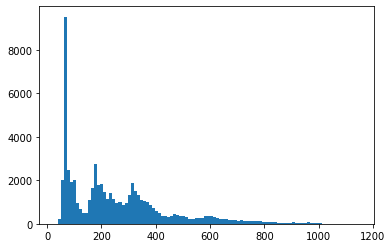

min: 26.948001614640976
max: 1148.8147200440105
60.604003167522066 71.82267035181576


In [20]:
# plot histogram of distances
# and print mean, median and mode

out = plt.hist(d, bins=100)
counts = out[0]
bins = out[1]
plt.show()
print(f'min: {np.min(d)}')
print(f'max: {np.max(d)}')
# print(np.mean(d))
# print(np.median(d))
# mode
print(bins[np.argmax(counts)],bins[np.argmax(counts)+1])


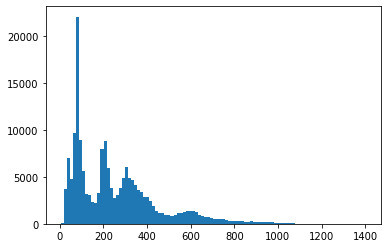

min: 5.398205720422296
max: 1400.6734987141008
75.16197037010623 89.11472330004301


In [17]:
# plot histogram of distances
# and print mean, median and mode

out = plt.hist(d, bins=100)
counts = out[0]
bins = out[1]
plt.show()
print(f'min: {np.min(d)}')
print(f'max: {np.max(d)}')
# print(np.mean(d))
# print(np.median(d))
# mode
print(bins[np.argmax(counts)],bins[np.argmax(counts)+1])
